# Title:ConcreteCompressiveStrength

## 1.Reading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Concrete_Data.xls")

In [3]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 2.Shape of the data

In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
list_features=pd.DataFrame()

In [7]:
list_features['Variables']=df.columns

In [8]:
list_features

,Variables
0,Cement (component 1)(kg in a m^3 mixture)
1,Blast Furnace Slag (component 2)(kg in a m^3 m...
2,Fly Ash (component 3)(kg in a m^3 mixture)
3,Water (component 4)(kg in a m^3 mixture)
4,Superplasticizer (component 5)(kg in a m^3 mix...
5,Coarse Aggregate (component 6)(kg in a m^3 mi...
6,Fine Aggregate (component 7)(kg in a m^3 mixture)
7,Age (day)
8,"Concrete compressive strength(MPa, megapascals)"


In [9]:
import re
re_features=re.compile(r'(\w*.*)\(')

In [10]:
re_features.findall(list_features['Variables'][8])

['Concrete compressive strength']

In [11]:
list_features['Variables']=list_features['Variables'].apply(lambda x:re_features.findall(x))

In [12]:
list_features
    

,Variables
0,[Cement (component 1)]
1,[Blast Furnace Slag (component 2)]
2,[Fly Ash (component 3)]
3,[Water (component 4)]
4,[Superplasticizer (component 5)]
5,[Coarse Aggregate (component 6)]
6,[Fine Aggregate (component 7)]
7,[Age ]
8,[Concrete compressive strength]


In [13]:
list_features['Variables']=list_features['Variables'].apply(lambda x:"".join(x))

In [14]:
list_features

,Variables
0,Cement (component 1)
1,Blast Furnace Slag (component 2)
2,Fly Ash (component 3)
3,Water (component 4)
4,Superplasticizer (component 5)
5,Coarse Aggregate (component 6)
6,Fine Aggregate (component 7)
7,Age
8,Concrete compressive strength


In [15]:
features=re.compile(r'[A-Z][a-z]*')

In [16]:
list_features['Variables']=list_features['Variables'].apply(lambda x:features.findall(x))

In [17]:
list_features

,Variables
0,[Cement]
1,"[Blast, Furnace, Slag]"
2,"[Fly, Ash]"
3,[Water]
4,[Superplasticizer]
5,"[Coarse, Aggregate]"
6,"[Fine, Aggregate]"
7,[Age]
8,[Concrete]


In [18]:
list_features['Variables']=list_features['Variables'].apply(lambda x:"".join(x))

In [19]:
list_features

,Variables
0,Cement
1,BlastFurnaceSlag
2,FlyAsh
3,Water
4,Superplasticizer
5,CoarseAggregate
6,FineAggregate
7,Age
8,Concrete


In [20]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [21]:
df.rename({'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BlastFurnaceSlag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'FlyAsh',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'CoarseAggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAggregate', 'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ':'Concrete'},axis=1,inplace=True)

In [22]:
df.to_excel("Concretestrength.xls")

In [23]:
df1=pd.read_excel("Concretestrength.xls")

In [24]:
df1.drop("Unnamed: 0",axis=1,inplace=True)

## Features and their data types

In [25]:
x=df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Concrete          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Checking Null values in the feature variables

In [26]:
df1.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Concrete            0
dtype: int64

In [27]:
df1.isin([0.0,'NaN']).sum()

Cement                0
BlastFurnaceSlag    466
FlyAsh              566
Water                 0
Superplasticizer    379
CoarseAggregate       0
FineAggregate         0
Age                   0
Concrete              0
dtype: int64

In [28]:
l1=[]
for i in df1['FlyAsh']:
    if i !=0.0:
        l1.append(i)
        
l1=pd.Series(l1)


In [29]:
l2=[]
for i in df1['Superplasticizer']:
    if i!=0.0:
        l2.append(i)
l2=pd.Series(l2)
print(l2.mean())
    

9.814447004608294


In [30]:
l3=[]
for i in df1['BlastFurnaceSlag']:
    if i!=0.0:
        l3.append(i)
l3=pd.Series(l3)
print(len(l3))
print(l3.mean())

564
134.95097517730503


print(l1.mean())

# Imputing Null values

In [31]:
df1['BlastFurnaceSlag']=df1['BlastFurnaceSlag'].replace(to_replace=0.0,value=l3.mean())

In [32]:
df1['FlyAsh']=df1['FlyAsh'].replace(to_replace=0.0,value=l1.mean())

In [33]:
df1['Superplasticizer']=df1['Superplasticizer'].replace(to_replace=0.0,value=l2.mean())

In [34]:
df1.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Concrete            0
dtype: int64

In [35]:
df1.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concrete
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,134.950975,120.286099,181.566359,9.814447,972.918592,773.578883,45.662136,35.817836
std,104.507142,54.110758,22.591012,21.355567,3.641334,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.020000,24.460000,121.750000,1.720000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,128.925000,120.286099,164.900000,8.190000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,134.950975,120.286099,185.000000,9.814447,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,120.286099,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Checking Outliers in the features
### Used IQR to detect the outliers and using z-score also we can detect outliers
#### outlier means a datapoint in a data set is distant from other observations****

In [36]:
import numpy as np

In [37]:
def calIQR(x):
    Q1,Q3=np.percentile(x,[25,75])
    print("Quartiles for {} are".format(i))
    IQR=Q3-Q1
    print("IQR is:",IQR)
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print("The lower and Upper Bounds for x are :",lower_limit,upper_limit)
    return lower_limit,upper_limit
    

In [38]:
L,U=calIQR(df1['Age']) 
df1['Age']=np.where(df1['Age']>U,U,np.where(df1['Age']<L,L,df1['Age']))


Quartiles for 100.5 are
IQR is: 49.0
The lower and Upper Bounds for x are : -66.5 129.5


In [39]:
for i in df1.columns:
    x=sorted(df1[i])
    L,U=calIQR(x)
    df1[i]=np.where(df1[i]>U,U,np.where(df1[i]<L,L,df1[i]))

Quartiles for Cement are
IQR is: 157.625
The lower and Upper Bounds for x are : -44.0625 586.4375
Quartiles for BlastFurnaceSlag are
IQR is: 14.024999999999977
The lower and Upper Bounds for x are : 107.88750000000005 163.98749999999995
Quartiles for FlyAsh are
IQR is: 0.0
The lower and Upper Bounds for x are : 120.28609913793102 120.28609913793102
Quartiles for Water are
IQR is: 27.099999999999994
The lower and Upper Bounds for x are : 124.25000000000001 232.64999999999998
Quartiles for Superplasticizer are
IQR is: 1.9700000000000006
The lower and Upper Bounds for x are : 5.2349999999999985 13.115000000000002
Quartiles for CoarseAggregate are
IQR is: 97.40000000000009
The lower and Upper Bounds for x are : 785.8999999999999 1175.5000000000002
Quartiles for FineAggregate are
IQR is: 93.05000000000007
The lower and Upper Bounds for x are : 591.3749999999998 963.575
Quartiles for Age are
IQR is: 49.0
The lower and Upper Bounds for x are : -66.5 129.5
Quartiles for Concrete are
IQR is: 22

In [40]:
df1.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concrete
count,1030.000000,1030.000000,1.030000e+03,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,135.415381,1.202861e+02,181.542573,9.449059,972.918592,773.437985,38.070388,35.812577
std,104.507142,18.607441,2.530761e-12,21.225724,2.121059,77.753818,79.814745,35.782271,16.691470
min,102.000000,107.887500,1.202861e+02,124.250000,5.235000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,128.925000,1.202861e+02,164.900000,8.190000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,134.950975,1.202861e+02,185.000000,9.814447,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,1.202861e+02,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,163.987500,1.202861e+02,232.650000,13.115000,1145.000000,963.575000,129.500000,79.780044


In [1]:
df1.head(5)

NameError: name 'df1' is not defined

# Univariate Analysis
##### It helps to understand more about the data
##### It helps us to analyze the data
## Visualization of every feature in dataset

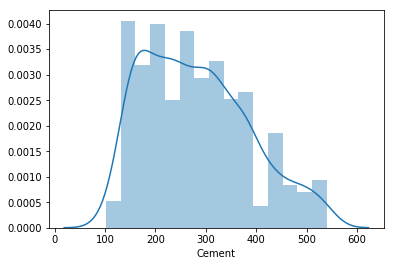

In [41]:
sns.distplot(df1['Cement'])
plt.show()

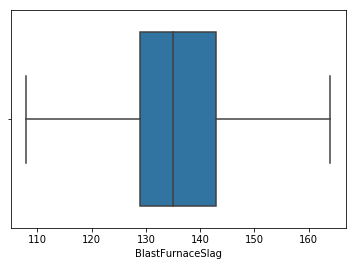

In [42]:
sns.boxplot(df1['BlastFurnaceSlag'])
plt.show()

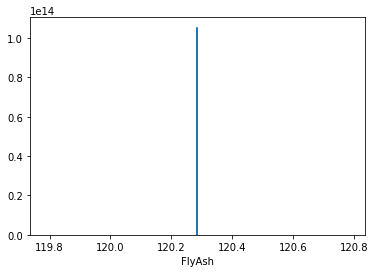

In [43]:
sns.distplot(df1['FlyAsh'])
plt.show()

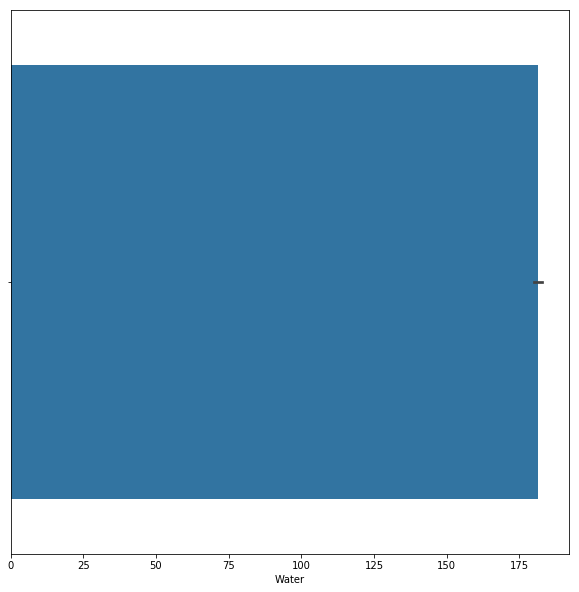

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(df1['Water'])
plt.show()

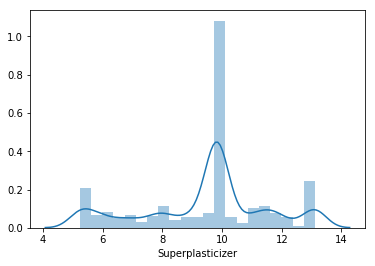

In [45]:
sns.distplot(df1['Superplasticizer'])
plt.show()

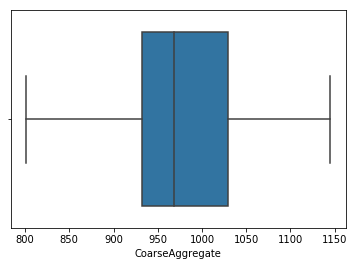

In [46]:
sns.boxplot(df1['CoarseAggregate'])
plt.show()

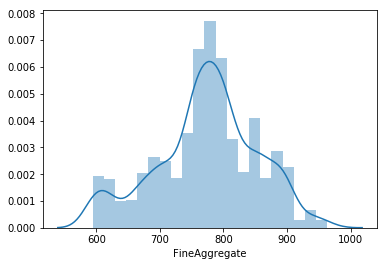

In [47]:
sns.distplot(df1['FineAggregate'])
plt.show()

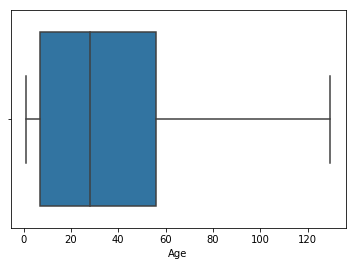

In [48]:
sns.boxplot(df1['Age'])
plt.show()

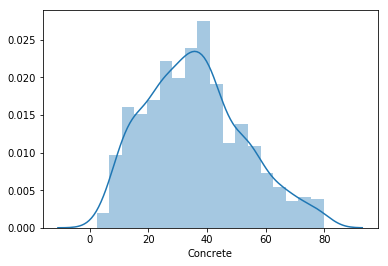

In [49]:
sns.distplot(df1['Concrete'])
plt.show()

## BIVARIATE ANALYSIS

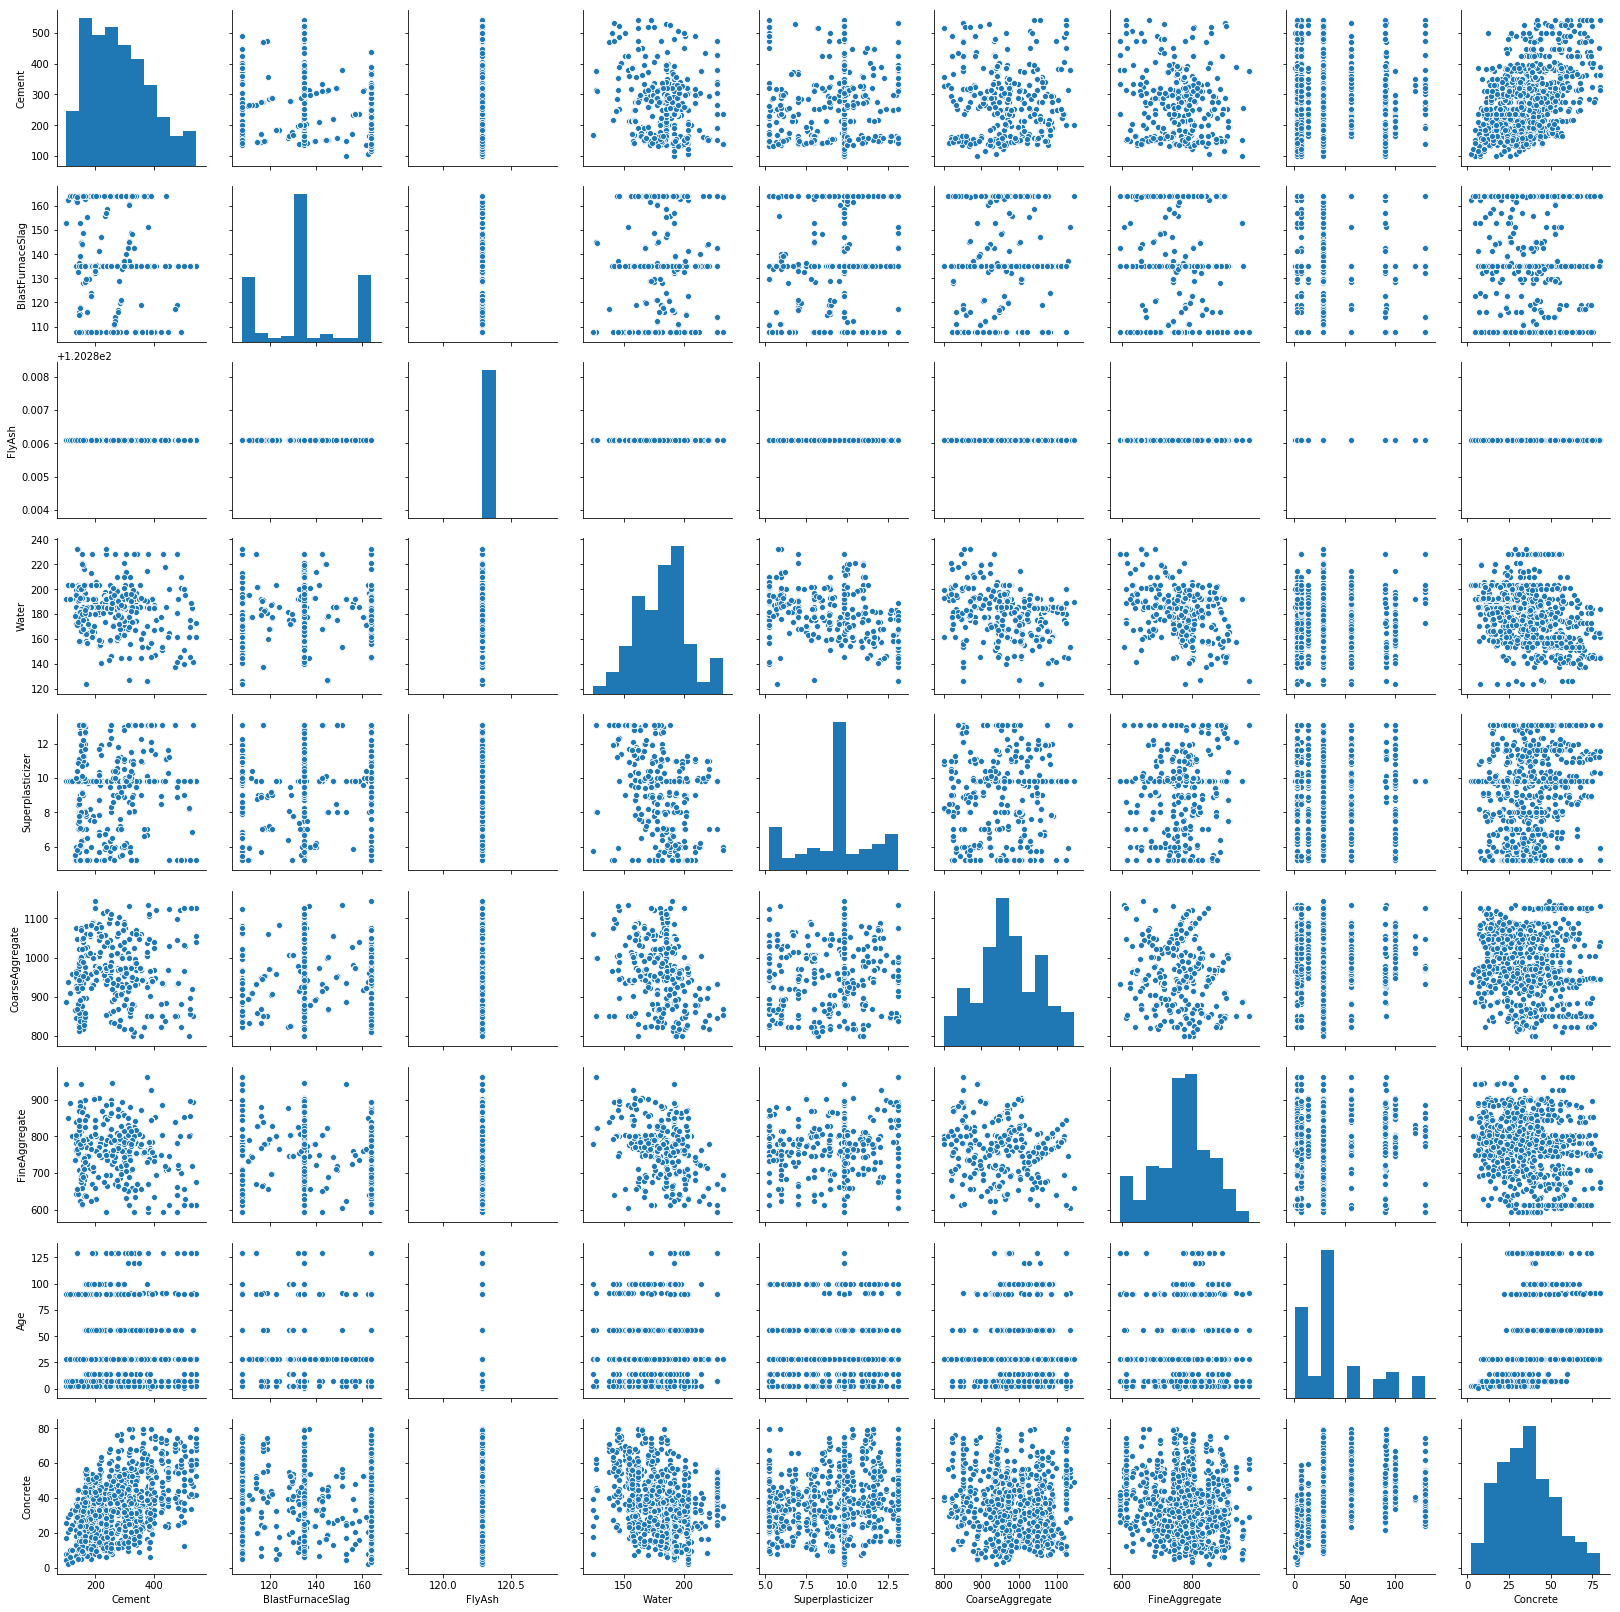

In [50]:
sns.pairplot(df1)
plt.show()

In [51]:
df1['FlyAsh']

0       120.286099
1       120.286099
2       120.286099
3       120.286099
4       120.286099
           ...    
1025    120.286099
1026    120.286099
1027    120.286099
1028    120.286099
1029    120.286099
Name: FlyAsh, Length: 1030, dtype: float64

## Correlation Matrix
### cement and age are 50% correlated with the concrete strength  and other features are very less correlated

In [52]:
df1.corr()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concrete
Cement,1.000000e+00,-2.447818e-01,1.177364e-15,-8.158840e-02,2.387156e-01,-1.093560e-01,-2.253132e-01,5.432292e-02,4.980089e-01
BlastFurnaceSlag,-2.447818e-01,1.000000e+00,3.884961e-14,1.869692e-01,4.938828e-02,-4.868825e-03,-1.905636e-01,-5.282614e-02,-7.340434e-02
FlyAsh,1.177364e-15,3.884961e-14,1.000000e+00,1.009049e-14,2.658435e-14,4.613965e-15,1.685802e-14,-3.224152e-16,-1.510805e-15
Water,-8.158840e-02,1.869692e-01,1.009049e-14,1.000000e+00,-3.207613e-01,-1.802602e-01,-4.489663e-01,1.896290e-01,-2.909660e-01
Superplasticizer,2.387156e-01,4.938828e-02,2.658435e-14,-3.207613e-01,1.000000e+00,-6.615809e-02,9.317102e-02,1.856614e-02,1.827987e-01
CoarseAggregate,-1.093560e-01,-4.868825e-03,4.613965e-15,-1.802602e-01,-6.615809e-02,1.000000e+00,-1.765667e-01,1.229447e-02,-1.652413e-01
FineAggregate,-2.253132e-01,-1.905636e-01,1.685802e-14,-4.489663e-01,9.317102e-02,-1.765667e-01,1.000000e+00,-9.656708e-02,-1.696092e-01
Age,5.432292e-02,-5.282614e-02,-3.224152e-16,1.896290e-01,1.856614e-02,1.229447e-02,-9.656708e-02,1.000000e+00,4.698092e-01
Concrete,4.980089e-01,-7.340434e-02,-1.510805e-15,-2.909660e-01,1.827987e-01,-1.652413e-01,-1.696092e-01,4.698092e-01,1.000000e+00


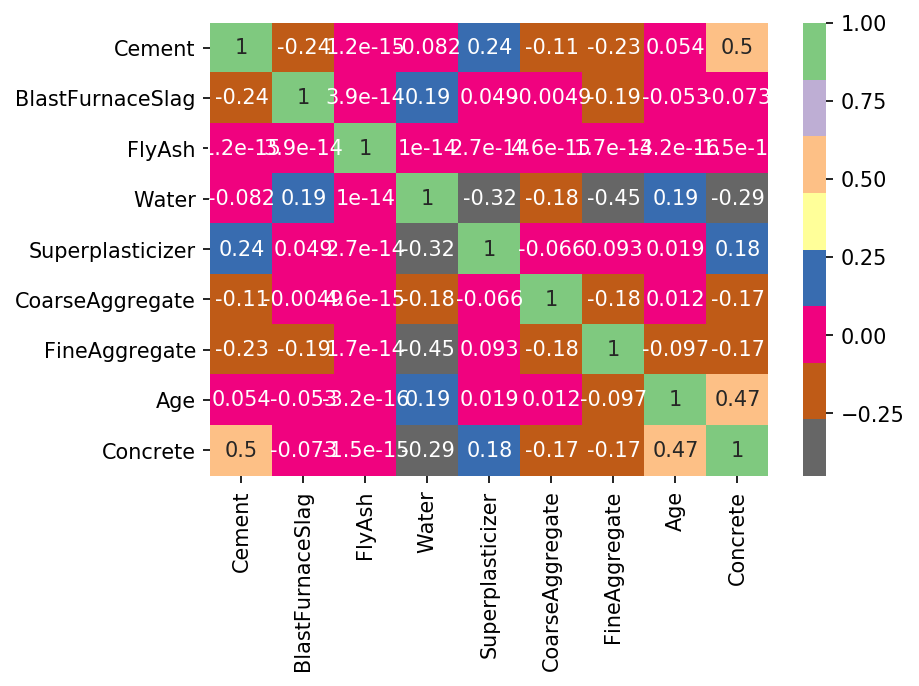

In [53]:
plt.figure(dpi=150)
sns.heatmap(df1.corr(),cmap='Accent_r',annot=True)
plt.show()

## Multiple Linear Regression using statsmodel

In [54]:
X=df1.drop("Concrete",axis=1)
Y=df1.Concrete

In [55]:
import os

In [56]:
import statsmodels.formula.api as smf

In [57]:
X.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')

In [58]:
"+".join(X.columns)

'Cement+BlastFurnaceSlag+FlyAsh+Water+Superplasticizer+CoarseAggregate+FineAggregate+Age'

In [59]:
olsmodel1=smf.ols(formula="Concrete ~ Cement+BlastFurnaceSlag+FlyAsh+Water+Superplasticizer+CoarseAggregate+FineAggregate+Age",data=df1).fit()

In [60]:
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:               Concrete   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     343.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          3.87e-263
Time:                        11:47:12   Log-Likelihood:                -3737.8
No. Observations:                1030   AIC:                             7492.
Df Residuals:                    1022   BIC:                             7531.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0151      0.001  

# ALgorithms
### Linear Regression

## Split the dataset into Training and test dataset

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [63]:
x_train.shape,x_test.shape

((690, 8), (340, 8))

In [64]:
y_train.shape,y_test.shape

((690,), (340,))

## Train the model on the train dataset

In [65]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
ml.coef_,ml.intercept_

(array([ 6.11706465e-02,  1.27431820e-01,  2.13717932e-15, -4.92014073e-01,
        -9.71305473e-01, -6.82735688e-02, -7.06578632e-02,  2.55320248e-01]),
 210.93205958624884)

In [67]:
y_train_pred=ml.predict(x_train)

## Predict the test Results

In [68]:
y_test_pred=ml.predict(x_test)

## Evaluate the model

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_train,y_train_pred)

0.7049661189782817

In [70]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

9.23332115860864

In [71]:
r2_score(y_test,y_test_pred)

0.6857428643098293

In [72]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

8.982717828902137

## Plot the Results

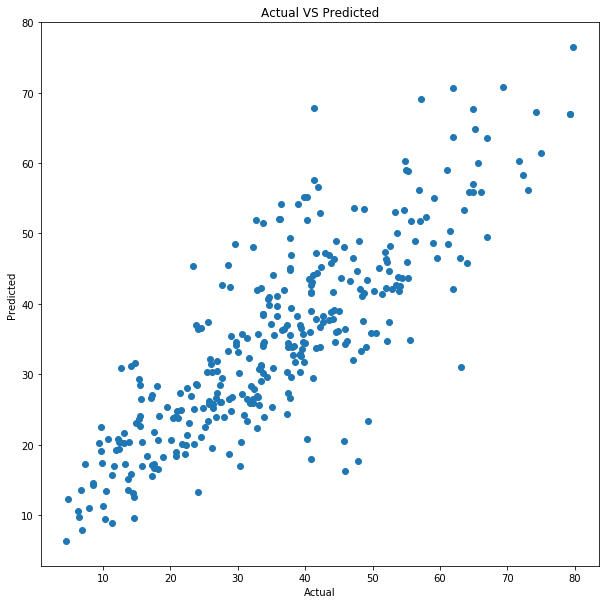

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()

## Predicted Values

In [74]:
pred_y_test=pd.DataFrame({'Actual':y_test,'Predictedvalues':y_test_pred,'Difference':y_test-y_test_pred})

In [75]:
pred_y_test

,Actual,Predictedvalues,Difference
747,26.062193,31.423716,-5.361523
718,10.354551,9.505268,0.849282
175,79.296635,66.942386,12.354248
828,74.987410,61.359708,13.627701
713,9.694722,19.138490,-9.443768
...,...,...,...
285,21.601283,24.987722,-3.386439
71,28.799413,42.354233,-13.554820
49,32.823194,22.398676,10.424519
179,79.296635,66.942386,12.354248


In [76]:
## Ridge and Lasso Regression Techniques

In [77]:
from sklearn.linear_model import Ridge,Lasso

In [78]:
lm=Ridge(alpha=0.8)

In [79]:
lm.fit(x_train,y_train)


Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
y_train_predict=lm.predict(x_train)

## Evaluate Ridge Regression

In [81]:
y_test_predict=lm.predict(x_test)

In [82]:
import numpy as np

In [83]:
from sklearn.metrics import r2_score,mean_squared_error

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))

In [85]:
r2score=r2_score(y_train,y_train_predict)

In [86]:
print("rmse_train:",rmse_train,"R2_score :",r2score)

rmse_train: 9.233321178422019 R2_score : 0.7049661177120811


In [87]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_predict))

In [88]:
r2score_test=r2_score(y_test,y_test_predict)

In [89]:
print("rmse_test",rmse_test,"r2score_test",r2score_test)

rmse_test 8.982663735109805 r2score_test 0.685746649201969


## Lasso Regression

In [90]:
lm=Lasso(alpha=1)

In [91]:
lm.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
y_train_predict_lm=lm.predict(x_train)

## Evaluate Lasso Regression

In [93]:
lm_rmse_train=np.sqrt(mean_squared_error(y_train,y_train_predict_lm))

In [94]:
r2_score_lm=r2_score(y_train,y_train_predict_lm)

In [95]:
print("rmse_train and r2score",lm_rmse_train,r2_score_lm)

rmse_train and r2score 9.250960326571201 0.7038377875683572


In [96]:
y_test_predict_lm=lm.predict(x_test)

In [97]:
r2_score_lm_test=r2_score(y_test,y_test_predict_lm)

In [98]:
lm_rmse_test=np.sqrt(mean_squared_error(y_test,y_test_predict_lm))

In [99]:
print("r2_score_lm_test",r2_score_lm_test)

r2_score_lm_test 0.6886798599911015


In [100]:
print("lm_rmse_test",lm_rmse_test)

lm_rmse_test 8.940643789619813


In [101]:
pred_y_test_lm=pd.DataFrame({'Actual':y_test,'Predictedvalues':y_test_predict_lm,'Difference':y_test-y_test_predict_lm})

In [102]:
pred_y_test_lm

,Actual,Predictedvalues,Difference
747,26.062193,31.713015,-5.650823
718,10.354551,9.990710,0.363841
175,79.296635,66.734108,12.562526
828,74.987410,60.551105,14.436305
713,9.694722,19.373071,-9.678349
...,...,...,...
285,21.601283,24.603678,-3.002395
71,28.799413,41.813774,-13.014362
49,32.823194,23.330351,9.492844
179,79.296635,66.734108,12.562526


## Train the model using  Decision Tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
dt=DecisionTreeRegressor()

In [105]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [106]:
y_pred_dt=dt.predict(x_train)


## Predict the test results

In [107]:
y_pred_dt_test=dt.predict(x_test)


## Evaluate the model on train and test data

In [108]:
r2square_dt_train =r2_score(y_train,y_pred_dt)


In [109]:
rmse_dt_train=np.sqrt(mean_squared_error(y_train,y_pred_dt))


In [110]:
r2square_dt_test =r2_score(y_test,y_pred_dt_test)


In [111]:
rmse_dt_test=np.sqrt(mean_squared_error(y_test,y_pred_dt_test))


In [112]:
print("r2square_dt_train",r2square_dt_train)
print("rmse_dt_train",rmse_dt_train)

r2square_dt_train 0.9955725976638878
rmse_dt_train 1.131088249123423


In [113]:
print("r2square_dt_test",r2square_dt_test)
print("rmse_dt_test",rmse_dt_test)

r2square_dt_test 0.779456247072656
rmse_dt_test 7.525104996299689



## Random Forest Algorithm

## Feature Scaling 

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training the Algorithm

In [115]:
from sklearn.ensemble import RandomForestRegressor
rfregressor=RandomForestRegressor(n_estimators=10,random_state=0)

C:\Users\padma\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Fit the RandomForestMOdel ornTraining data

In [116]:
rfregressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [117]:




y_pred_train_rf=rfregressor.predict(x_train)

In [118]:
y_pred_test_rf=rfregressor.predict(x_test)

## Evaluating the RF Algorithm

In [119]:
r2score_rf_train=r2_score(y_train,y_pred_train_rf)

In [120]:
rmse_rf_train=np.sqrt(mean_squared_error(y_train,y_pred_train_rf))

In [121]:
rmse_rf_test=np.sqrt(mean_squared_error(y_test,y_pred_test_rf))

In [122]:
r2score_rf_test=r2_score(y_test,y_pred_test_rf)

In [123]:
print("r2score_rf_train",r2score_rf_train)

r2score_rf_train 0.9747625231020652


In [124]:
print("rmse_rf_train",rmse_rf_train)

rmse_rf_train 2.7005048574053183


In [125]:
print("r2score_rf_test",r2score_rf_test)
print("rmse_rf_test",rmse_rf_test)

r2score_rf_test 0.876174622049042
rmse_rf_test 5.638583482217895


In [126]:
algo_data={"ModelName":['MLR','RIDGE','LASSO','DECISIONTREE','RANDOMFOREST'],
          "r2_score_train":[0.719,0.719,0.718,0.995,0.97],
          "rmse_train":[9.0153,9.01534,9.0233,1.128,2.618],
           "r2_score_test":[0.7192,0.7192,0.7215,0.776,0.875],
           "rmse_test":[9.015,8.503,8.467,7.290,5.65]}

In [127]:
df_Models=pd.DataFrame(algo_data)


In [128]:
df_Models

,ModelName,r2_score_train,rmse_train,r2_score_test,rmse_test
0,MLR,0.719,9.01530,0.7192,9.015
1,RIDGE,0.719,9.01534,0.7192,8.503
2,LASSO,0.718,9.02330,0.7215,8.467
3,DECISIONTREE,0.995,1.12800,0.7760,7.290
4,RANDOMFOREST,0.970,2.61800,0.8750,5.650


## KNN algorithm

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=11)

In [132]:
from sklearn.neighbors import KNeighborsRegressor

In [133]:
knn1=KNeighborsRegressor(n_neighbors=5)

In [138]:
knn1.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=99, p=2,
          weights='uniform')

In [139]:
pred_knn1=knn1.predict(X_train)

In [140]:
from sklearn import metrics

In [141]:
r2score=r2_score(pred_knn1,Y_train)

In [142]:
r2score

-1.529186410088431

In [143]:
pred_knn_test=knn1.predict(X_test)

In [144]:
metrics.r2_score(pred_knn_test,Y_test)

-1.509697451265339

## Hyperparameter K for best model

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
n=[3,5,7,9,11,13,15]
l=[1,2,3,4,5,6,7]
p=[1,2]

In [147]:
param_grid={'n_neighbors':[3,5,7,9,11,13,15]}

In [148]:
h=dict(leaf_size=l,n_neighbors=n,p=p)

In [149]:
knn_grid=KNeighborsRegressor()

In [150]:
model=GridSearchCV(knn_grid,h,cv=10)

In [151]:
bm=model.fit(X_train,Y_train)

In [152]:
print(bm.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 3, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [153]:
knn1=KNeighborsRegressor(n_neighbors=7,leaf_size=3,p=1)

In [154]:
knn1.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=3, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=1,
          weights='uniform')

In [155]:
pred_knn1=knn1.predict(X_train)

In [156]:
r2score=r2_score(pred_knn1,Y_train)

In [157]:
r2score

0.6422299117258009

In [158]:
rmsescore=np.sqrt(mean_squared_error(pred_knn1,Y_train))

In [159]:
rmsescore

8.07600301376739

In [160]:
r2score_test=r2_score(pred_knn_test,Y_test)

In [161]:
r2score_test

-1.509697451265339

In [162]:
rmsescore_test=np.sqrt(mean_squared_error(pred_knn_test,Y_test))

In [163]:
rmsescore_test

12.384135124790092

## SVM Algorithm

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=11)

In [166]:
from sklearn.svm import SVR

In [167]:
svm_linear=SVR(kernel='linear')

In [168]:
svm_linear.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [169]:
svm_linear_train=svm_linear.predict(X_train)

In [170]:
svm_linear_test=svm_linear.predict(X_test)

In [171]:
r2score_train=r2_score(Y_train,svm_linear_train)

In [172]:
r2score_test=r2_score(Y_test,svm_linear_test)

In [173]:
r2score_train

0.6913775778731295

In [174]:
r2score_test

0.697715426169949

In [175]:
rmse_train=np.sqrt(mean_squared_error(Y_train,svm_linear_train))

In [176]:
rmse_train

9.326315365152823

In [177]:
rmse_test=np.sqrt(mean_squared_error(Y_test,svm_linear_test))

In [178]:
rmse_test

8.942431363306

In [179]:
df_Models

,ModelName,r2_score_train,rmse_train,r2_score_test,rmse_test
0,MLR,0.719,9.01530,0.7192,9.015
1,RIDGE,0.719,9.01534,0.7192,8.503
2,LASSO,0.718,9.02330,0.7215,8.467
3,DECISIONTREE,0.995,1.12800,0.7760,7.290
4,RANDOMFOREST,0.970,2.61800,0.8750,5.650


In [180]:
df_Models=df_Models.append([{'ModelName':'KNN','r2_score_train':0.647,'rmse_train':7.951,'r2_score_test':0.4806,'rmse_test':8.692},{'ModelName':'SVM','r2_score_train':0.691,'rmse_train':9.326,'r2_score_test':0.697,'rmse_test':8.942}],ignore_index=True)

In [218]:
df_Models

,ModelName,r2_score_train,rmse_train,r2_score_test,rmse_test
0,MLR,0.719,9.01530,0.7192,9.015
1,RIDGE,0.719,9.01534,0.7192,8.503
2,LASSO,0.718,9.02330,0.7215,8.467
3,DECISIONTREE,0.995,1.12800,0.7760,7.290
4,RANDOMFOREST,0.970,2.61800,0.8750,5.650
5,KNN,0.647,7.95100,0.4806,8.692
6,SVM,0.691,9.32600,0.6970,8.942


In [219]:
np.arange(len(df_Models['ModelName']))

array([0, 1, 2, 3, 4, 5, 6])

In [220]:
list(df_Models['ModelName'])

['MLR', 'RIDGE', 'LASSO', 'DECISIONTREE', 'RANDOMFOREST', 'KNN', 'SVM']

In [221]:
indices=np.arange(len(df_Models['ModelName']))
models=['MLR', 'RIDGE', 'LASSO', 'DECISIONTREE', 'RANDOMFOREST', 'KNN', 'SVM']
width=0.25

In [222]:
indices

array([0, 1, 2, 3, 4, 5, 6])

In [223]:
import matplotlib.pyplot as plt

In [228]:
plt.figure(figsize=(15,10))
#plt.bar(indices-2*width,df_Models['rmse_test'],ec='k',label='RMSE_SCORE_TEST',width=width)
#plt.bar(indices-width,df_Models['rmse_train'],ec='k',label='RMSE_SCORE_TRAIN',width=width)
plt.bar(indices,df_Models['r2_score_train'],ec='k',label='R2_SCORE_TRAIN',width=width)
plt.bar(indices+width,df_Models['r2_score_test'],ec='k',label='R2_SCORE_TEST',width=width)
plt.xlabel('ModelName')
plt.legend()


In [229]:
plt.xticks(indices,['MLR', 'RIDGE', 'LASSO', 'DECISIONTREE', 'RANDOMFOREST', 'KNN', 'SVM'])

([<matplotlib.axis.XTick at 0x1fc4a38ea90>,
 <a list of 7 Text xticklabel objects>)

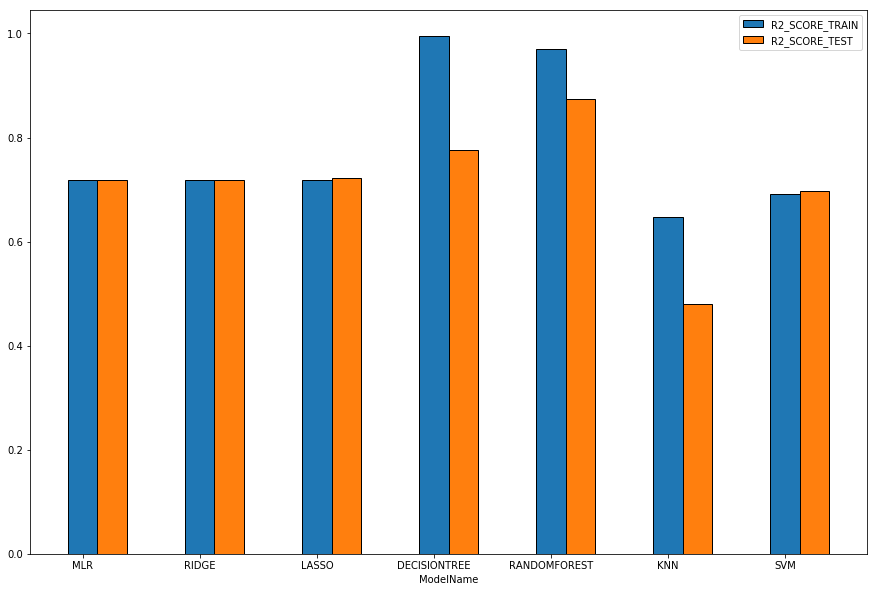

In [230]:
plt.show()

In [231]:
df_Models

,ModelName,r2_score_train,rmse_train,r2_score_test,rmse_test
0,MLR,0.719,9.01530,0.7192,9.015
1,RIDGE,0.719,9.01534,0.7192,8.503
2,LASSO,0.718,9.02330,0.7215,8.467
3,DECISIONTREE,0.995,1.12800,0.7760,7.290
4,RANDOMFOREST,0.970,2.61800,0.8750,5.650
5,KNN,0.647,7.95100,0.4806,8.692
6,SVM,0.691,9.32600,0.6970,8.942


COnclusion: 

RANDOMFORESTALGORITHM is good to predict concrete strength because it explaining 97% for train data and 87% for test data So it is the generalized model with lowbias and low variance compared to other algorithms